# Project:6 - Bank Churn Prediction (Neural Network Classifier )

### Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

### Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using Tensorflow Keras instead of the original Keras

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Read the dataset

In [2]:
# Downloading data
df_ini = pd.read_csv("bank.csv")

In [3]:
# Information data head
df_ini.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


In [4]:
# Data size information
print('Initial Data sized :',df_ini.shape)

Initial Data sized : (10000, 14)


In [5]:
# General Information
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### There are 3 features type object: Surname, Geography and Gender

In [6]:
# Check for missing value
df_ini.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# number of uniques in each feature 
df_ini.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# 1.- Drop the columns no used for Analysis

<p style="color:Blue"> 1.1- Dropping RowNumber, Customer ID and Surname</p>

In [8]:
# Dropping RowNumber, CustomerID, and Surname
df_ini = df_ini.drop(columns=['RowNumber','CustomerId','Surname'])

In [9]:
print('New Data size :', df_ini.shape)

New Data size : (10000, 11)


<p style="color:Blue"> 1.2- Changing Geography and gender to Dummy variables</p>

In [10]:
df_ini.groupby('Geography').Gender.count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Gender, dtype: int64

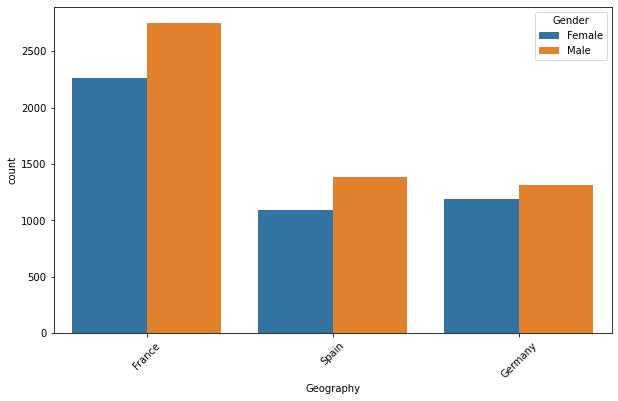

In [11]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Geography', data=df_ini, hue='Gender')
plt.setp(ax.get_xticklabels(), rotation=45);

##### The customer gender analysis is proportional in all the 3 countries 

In [12]:
# df is the dataframe use for Neural Network
df = pd.get_dummies(df_ini, columns=['Geography', 'Gender'], dtype='int')

In [13]:
# Statistical information
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p style="color:Blue"> 1.1- Exited (custumers left the bank) Analysis</p>

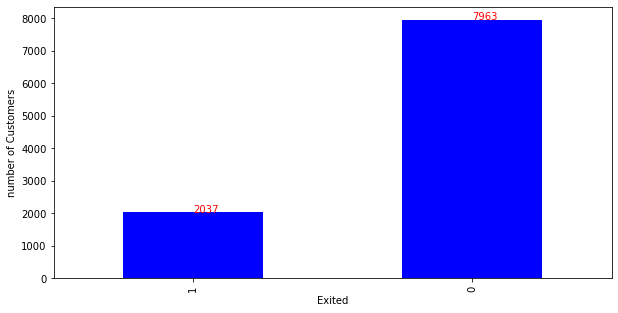

In [14]:
# 1.- Output data analysis - Exited
cust_1 =df_ini.groupby('Exited').Age.count().sort_values()
cust_1.plot(kind='bar', color='b', figsize=(10,5))
plt.ylabel('number of Customers')
for i, v in enumerate(cust_1):
    plt.text(i, v, int(v),color='r')

In [15]:
y_pl=len(df_ini.loc[df_ini['Exited']==1])
n_pl=len(df_ini.loc[df_ini['Exited']==0])
print("Percent of Exited Customers : {0} ({1:2.2f}%)".format(y_pl, (y_pl / (y_pl + n_pl)) * 100 ))
print("Percent of No Exited customers : {0} ({1:2.2f}%)".format(n_pl, (n_pl / (n_pl + y_pl)) * 100))

Percent of Exited Customers : 2037 (20.37%)
Percent of No Exited customers : 7963 (79.63%)


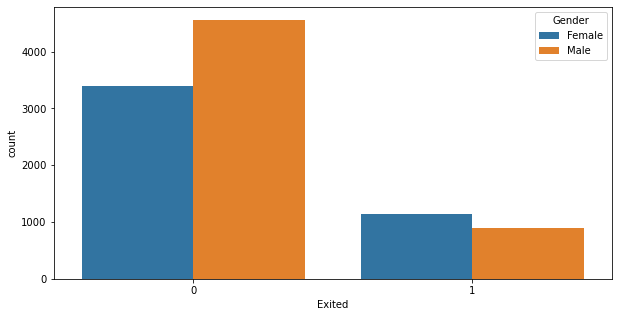

In [16]:
# 1.- Output data analysis - Exited
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Exited', data=df_ini, hue='Gender')

In [17]:
pd.crosstab(df_ini.Exited,df_ini.Gender)

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


##### 20.37% of the customer have left the Bank. 898 customer from 1139 customer are Males. 1139 customers are females.

<p style="color:Blue"> 1.2- Credit Score Analysis</p>

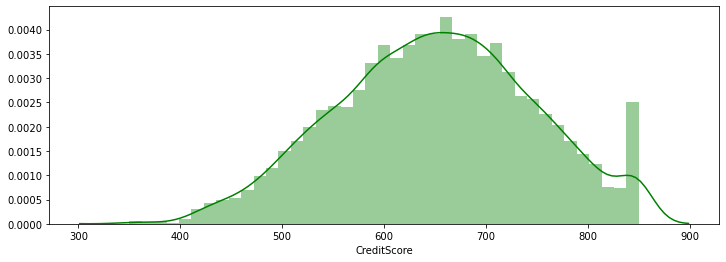

In [18]:
# 2.- CreditScore (univariante analysis)
plt.figure(figsize=(12,4));
sns.distplot(df_ini.CreditScore, kde=True, color='green');

CreditScore Min : 350


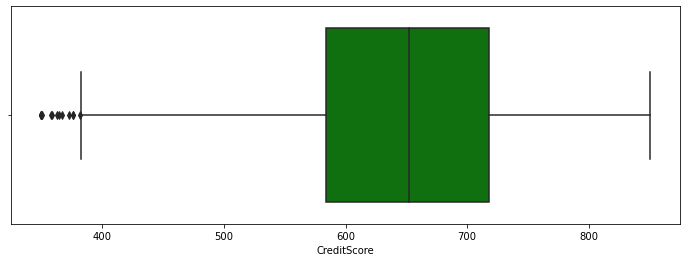

In [19]:
# 2.- CreditScore (univariante analysis)
plt.figure(figsize=(12,4));
sns.boxplot(df_ini.CreditScore, color='green');
print('CreditScore Min :', df_ini.CreditScore.min())

In [20]:
df_ini[df_ini.CreditScore>=850].groupby('Geography').Age.count()

Geography
France     114
Germany     65
Spain       54
Name: Age, dtype: int64

In [21]:
df_ini[(df_ini.CreditScore>=850) & (df_ini.Exited==1)].groupby('Geography').Age.count()

Geography
France     15
Germany    18
Spain      10
Name: Age, dtype: int64

#### France have more customers with CreditScore over 850 and few of them Excited the bank

In [22]:
df_ini[df_ini.CreditScore<400].groupby('Geography').Age.count()

Geography
France     6
Germany    6
Spain      7
Name: Age, dtype: int64

In [23]:
df_ini[(df_ini.CreditScore<400) & (df_ini.Exited==1)].groupby('Geography').Age.count()

Geography
France     6
Germany    6
Spain      7
Name: Age, dtype: int64

##### All customer with credit score below 400 have left the bank

<p style="color:Blue"> 1.3- Age custumers Analysis</p>

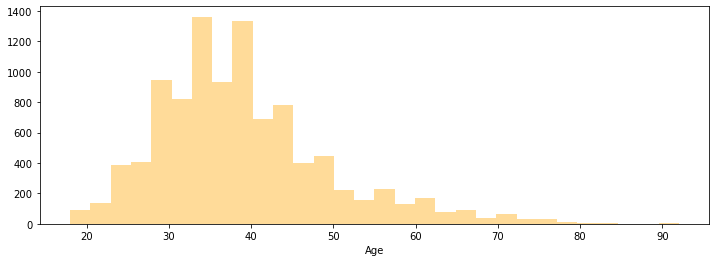

In [24]:
# 3.- Age (univariante analysis)
plt.figure(figsize=(12,4));
sns.distplot(df_ini.Age, kde=False, bins=30,color='orange');

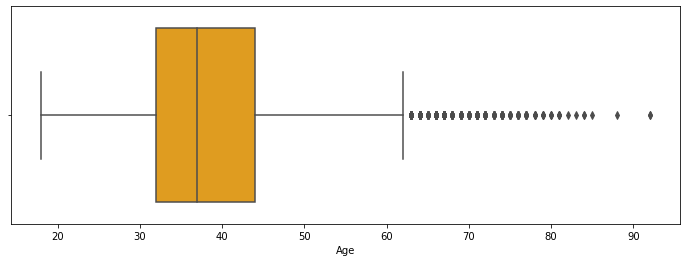

In [25]:
# 3.- Age (univariante analysis)
plt.figure(figsize=(12,4));
sns.boxplot(df_ini.Age, color='orange');

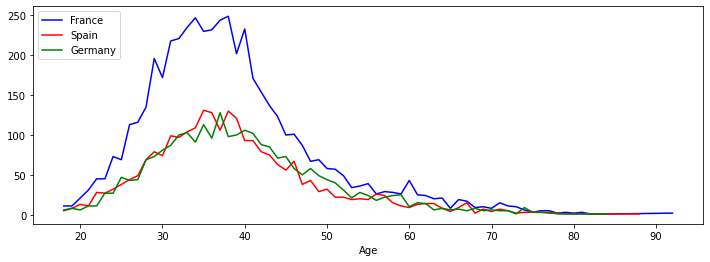

In [26]:
plt.figure(figsize=(12,4));
df_ini[df_ini.Geography=='France'].groupby('Age').Age.count().plot(color='b', label='France');
plt.legend(loc='upper left')
df_ini[df_ini.Geography=='Spain'].groupby('Age').Age.count().plot(color='red', label='Spain');
plt.legend(loc='upper left')
df_ini[df_ini.Geography=='Germany'].groupby('Age').Age.count().plot(color='green', label='Germany');
plt.legend(loc='upper left')

##### France have the oldes customers followed by Spain and Germany. 

<p style="color:Blue"> 1.4- Tenure custumers Analysis</p>

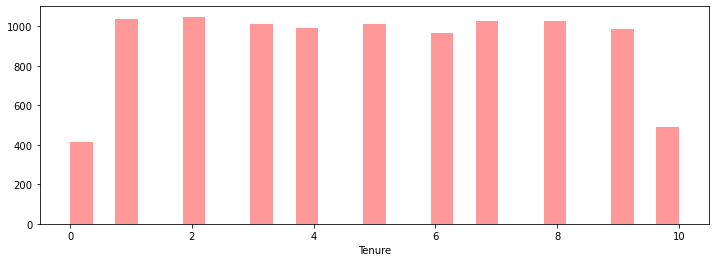

In [27]:
# 4.- Tenure (univariante analysis)
plt.figure(figsize=(12,4));
sns.distplot(df_ini.Tenure, kde=False, color='red');

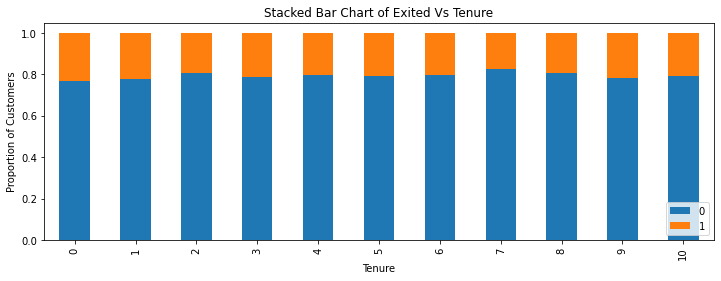

In [28]:
# 4.- Tenure (Bivariante analysis)
table=pd.crosstab(df_ini.Tenure, df_ini.Exited);
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(12,4));
plt.title('Stacked Bar Chart of Exited Vs Tenure');
plt.xlabel('Tenure');
plt.ylabel('Proportion of Customers');
plt.legend(loc='lower right');

##### The precent of Exited between the Tenuers is pretty similar

<p style="color:Blue"> 1.5- Balance custumers Analysis</p>

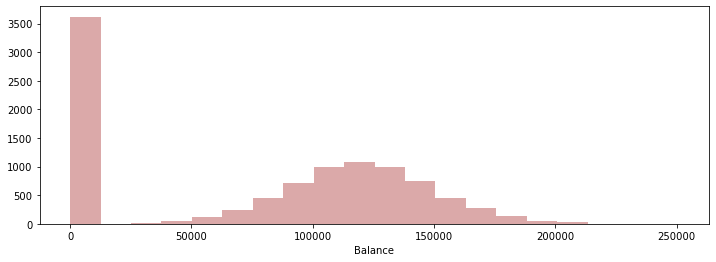

In [29]:
# 5.- Balance
plt.figure(figsize=(12,4));
sns.distplot(df_ini.Balance, kde=False, bins=20, color='brown');

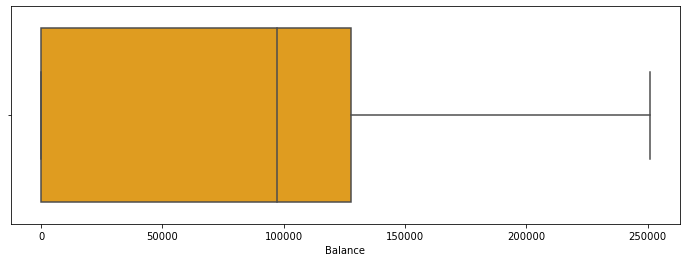

In [30]:
# 5.- Balance
plt.figure(figsize=(12,4));
sns.boxplot(df_ini.Balance, color='orange');

In [31]:
tcus = df_ini.shape[0]
cus_bal = df_ini[df_ini.Balance==0].Age.count()
print("Percent of Customers with zero Balance : {0} ({1:2.2f}%)".format(cus_bal, (cus_bal / tcus) * 100 ))

Percent of Customers with zero Balance : 3617 (36.17%)


In [32]:
tcus = df_ini.shape[0]
cus_bal = df_ini[(df_ini.Balance==0) & (df_ini.Exited==1)].Age.count()
print("Percent of Exited Customers with zero Balance : {0} ({1:2.2f}%)".format(cus_bal, (cus_bal / tcus) * 100 ))

Percent of Exited Customers with zero Balance : 500 (5.00%)


In [33]:
tcus = df_ini.shape[0]
cus_bal = df_ini[(df_ini.Balance==0) & (df_ini.Exited==0)].Age.count()
print("Percent of no Exited Customers with zero Balance : {0} ({1:2.2f}%)".format(cus_bal, (cus_bal / tcus) * 100 ))

Percent of no Exited Customers with zero Balance : 3117 (31.17%)


In [34]:
 df_ini[df_ini.Balance==0].groupby('Geography').Age.count() #.plot(kind='bar')

Geography
France    2418
Spain     1199
Name: Age, dtype: int64

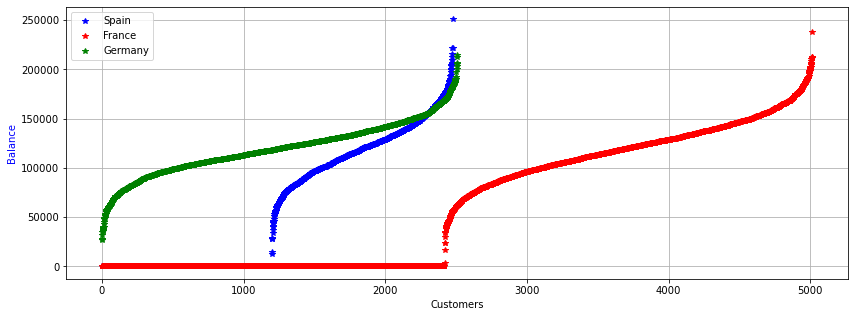

In [35]:
#Avg_Credit_Limit
df_acl = df_ini[df_ini.Geography=='Spain'].sort_values('Balance', ascending = True).reset_index(drop=True);
# Spain Balance
x = df_acl.index
y1 = df_acl.Balance
fig, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(x, y1, 'b*',label='Spain')
ax1.legend(loc='upper left')
ax1.set_xlabel('Customers')
ax1.set_ylabel('Balance', color='b')
plt.grid()
# France Balance
df_acl2 = df_ini[df_ini.Geography=='France'].sort_values('Balance', ascending = True).reset_index(drop=True);
x2 = df_acl2.index
y2 = df_acl2.Balance
ax1.plot(x2, y2, 'r*',label='France')
ax1.legend(loc='upper left')
# Germany Balance
df_acl3 = df_ini[df_ini.Geography=='Germany'].sort_values('Balance', ascending = True).reset_index(drop=True);
x3 = df_acl3.index
y3 = df_acl3.Balance
ax1.plot(x3, y3, 'g*',label='Germany')
ax1.legend(loc='upper left')
#
plt.show()

##### France have more customers with zero balance followed by Spain and none from Germany. 36.7% of total customer have zero balance. A few customers have balance over 150,000

<p style="color:Blue"> 1.6- Number of Products Analysis</p>

Geography  NumOfProducts  Exited
France     1              0         1950
                          1          564
           2              0         2232
                          1          135
           3              0           22
                          1           82
           4              1           29
Germany    1              0          771
                          1          578
           2              0          914
                          1          126
           3              0           10
                          1           86
           4              1           24
Spain      1              0          954
                          1          267
           2              0         1096
                          1           87
           3              0           14
                          1           52
           4              1            7
Name: Age, dtype: int64

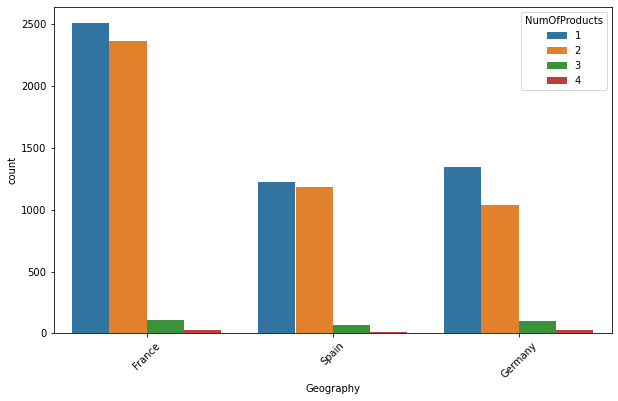

In [36]:
# 6.- NumberOfProducts
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Geography', data=df_ini, hue='NumOfProducts')
plt.setp(ax.get_xticklabels(), rotation=45);
df_ini.groupby(['Geography','NumOfProducts','Exited']).Age.count()

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


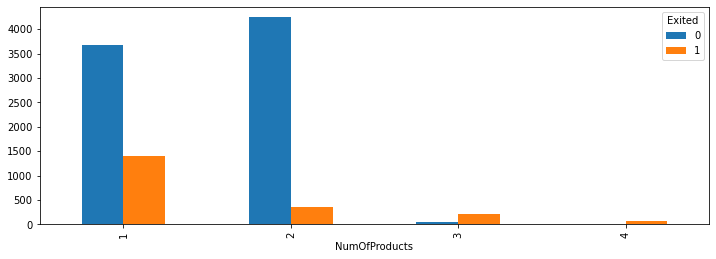

In [37]:
# 6.- NumberOfProducts
pd.crosstab(df_ini.NumOfProducts, df_ini.Exited).plot(kind='bar', figsize=(12,4), );
pd.crosstab(df_ini.NumOfProducts, df_ini.Exited)

##### Data shows customers with higher number of products have morec chances of leaving the bank. All customers with 4 NumOfProducts had left the bank.

<p style="color:Blue"> 1.7- Has Credit Card Analysis</p>

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


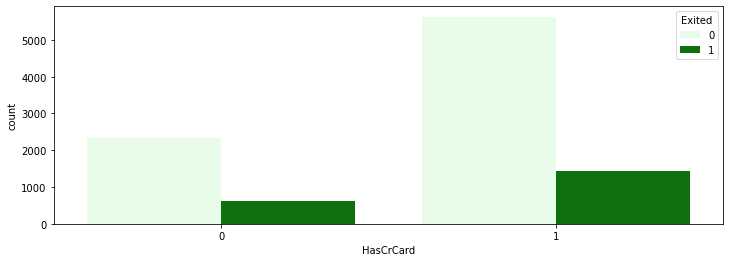

In [38]:
# 7.- HasCreditCard
plt.figure(figsize=(12,4));
sns.countplot(x='HasCrCard', data=df_ini, hue='Exited', color='green');
pd.crosstab(df_ini.HasCrCard, df_ini.Exited)

<p style="color:Blue"> 1.8- is Active Member Analysis</p>

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


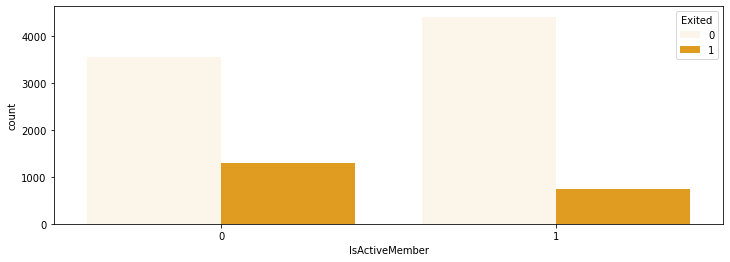

In [39]:
# 8.- Is Active Member analysis
plt.figure(figsize=(12,4));
sns.countplot(x='IsActiveMember', data=df_ini, hue='Exited',color='orange');
pd.crosstab(df_ini.IsActiveMember, df_ini.Exited)

<p style="color:Blue"> 1.9- Estimated Salary Analysis</p>

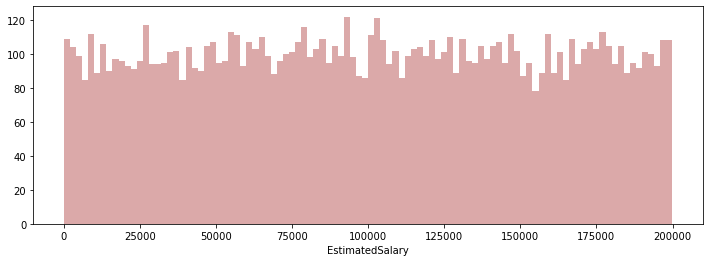

In [40]:
# 9.- Estimated Salary
plt.figure(figsize=(12,4));
sns.distplot(df_ini.EstimatedSalary, kde=False, bins=100, color='brown');

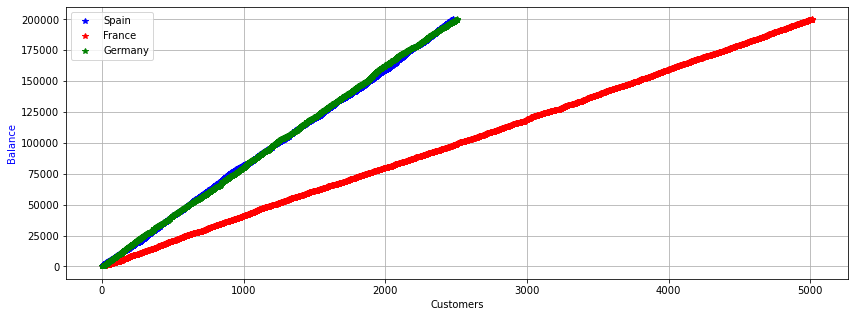

In [41]:
# 9.- Estimated Salary
#Avg_Credit_Limit
df_sal = df_ini[df_ini.Geography=='Spain'].sort_values('EstimatedSalary', ascending = True).reset_index(drop=True);
# Spain Balance
x = df_sal.index
y1 = df_sal.EstimatedSalary
fig, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(x, y1, 'b*',label='Spain')
ax1.legend(loc='upper left')
ax1.set_xlabel('Customers')
ax1.set_ylabel('Balance', color='b')
plt.grid()
# France Balance
df_sal2 = df_ini[df_ini.Geography=='France'].sort_values('EstimatedSalary', ascending = True).reset_index(drop=True);
x2 = df_sal2.index
y2 = df_sal2.EstimatedSalary
ax1.plot(x2, y2, 'r*',label='France')
ax1.legend(loc='upper left')
# Germany Balance
df_sal3 = df_ini[df_ini.Geography=='Germany'].sort_values('EstimatedSalary', ascending = True).reset_index(drop=True);
x3 = df_sal3.index
y3 = df_sal3.EstimatedSalary
ax1.plot(x3, y3, 'g*',label='Germany')
ax1.legend(loc='upper left')
#
plt.show()

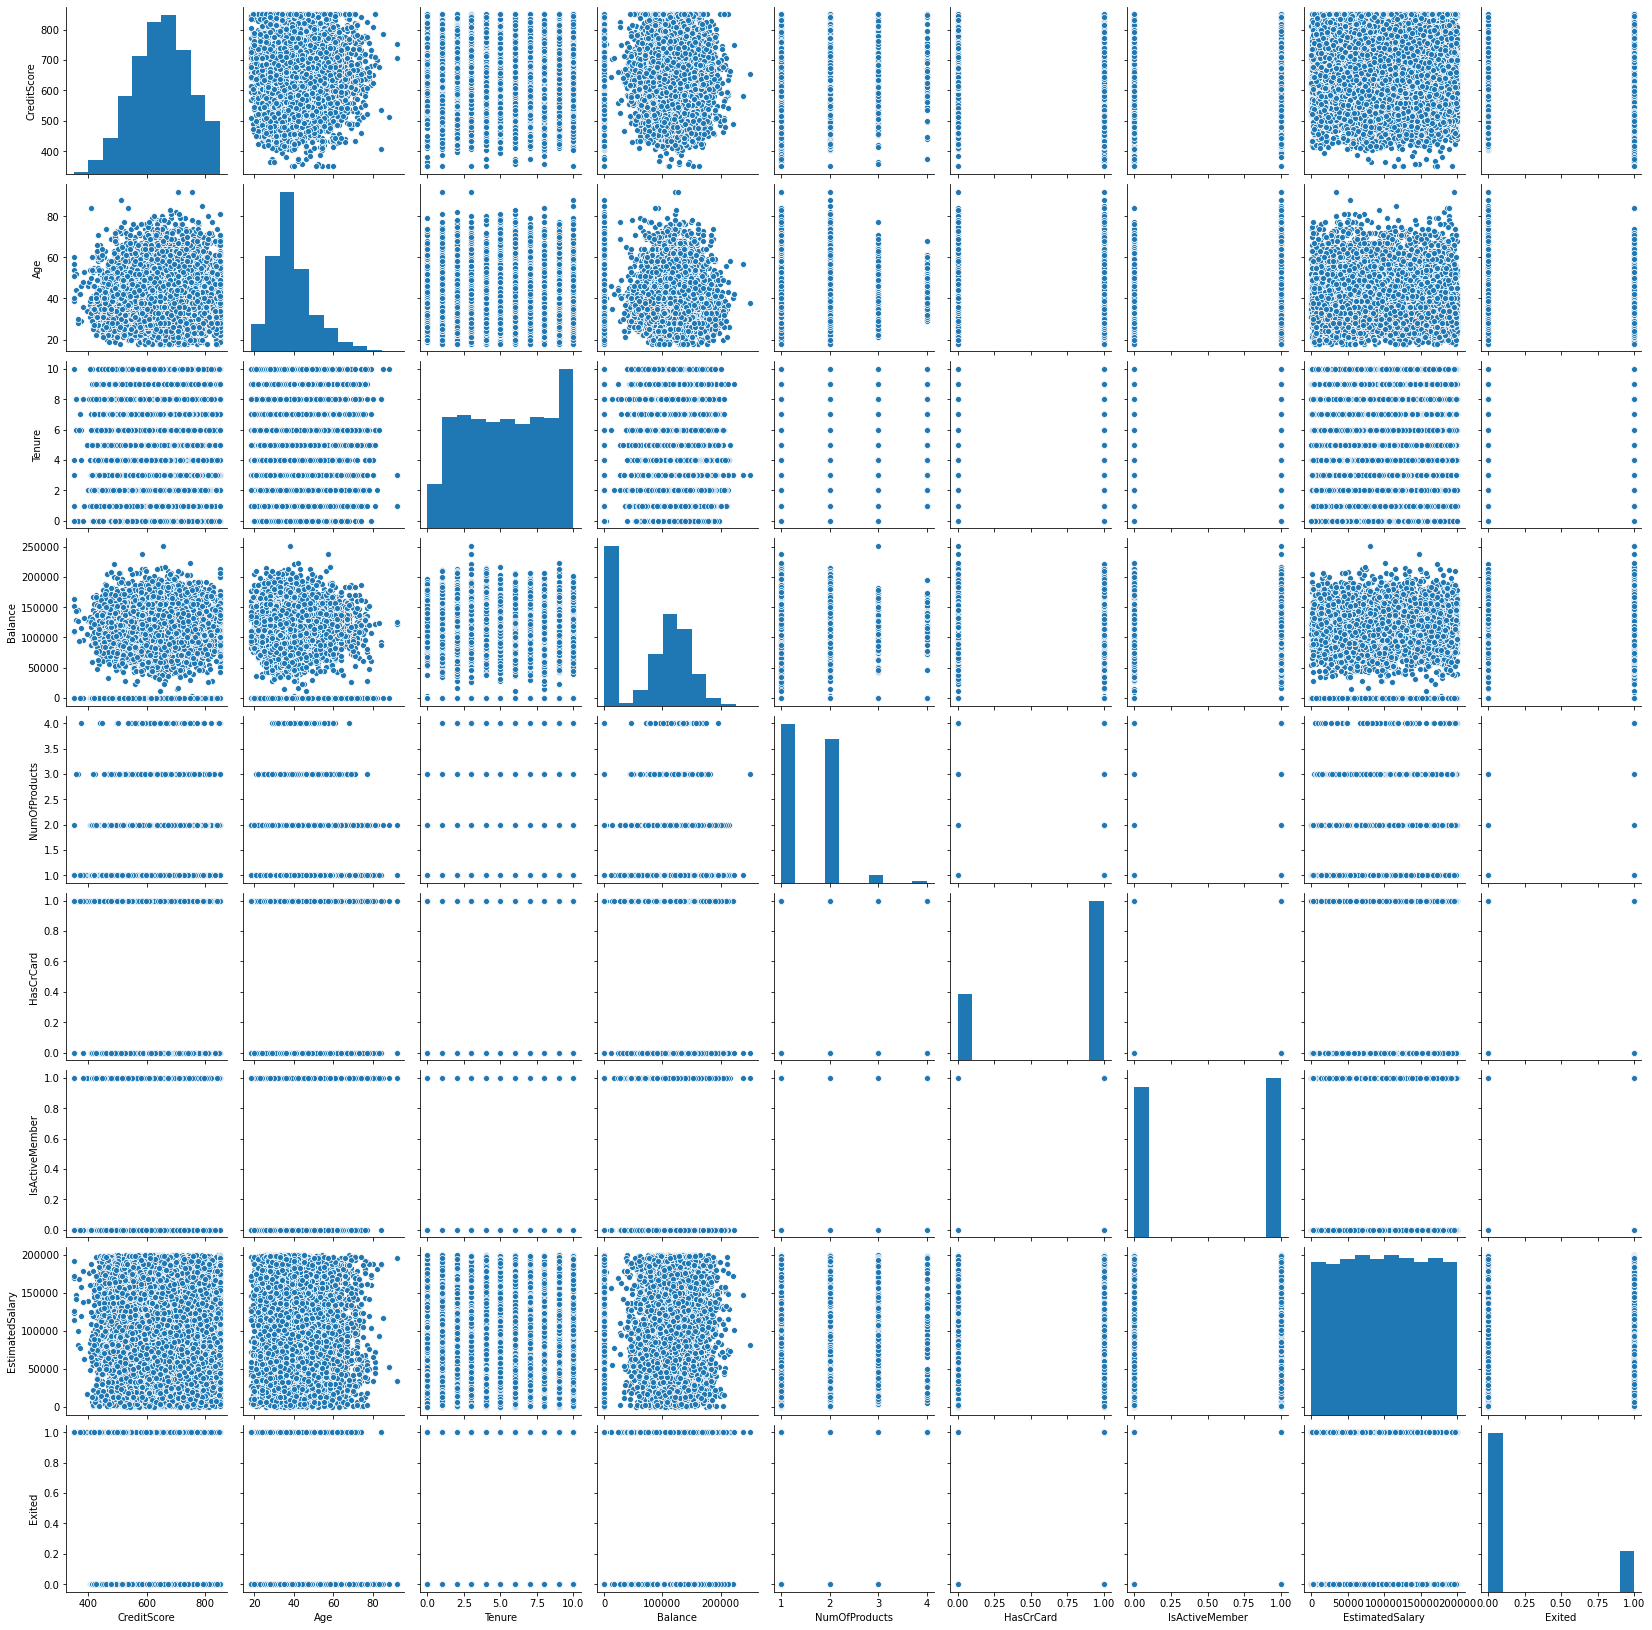

In [42]:
sns.pairplot(df_ini.select_dtypes(exclude ='object'));

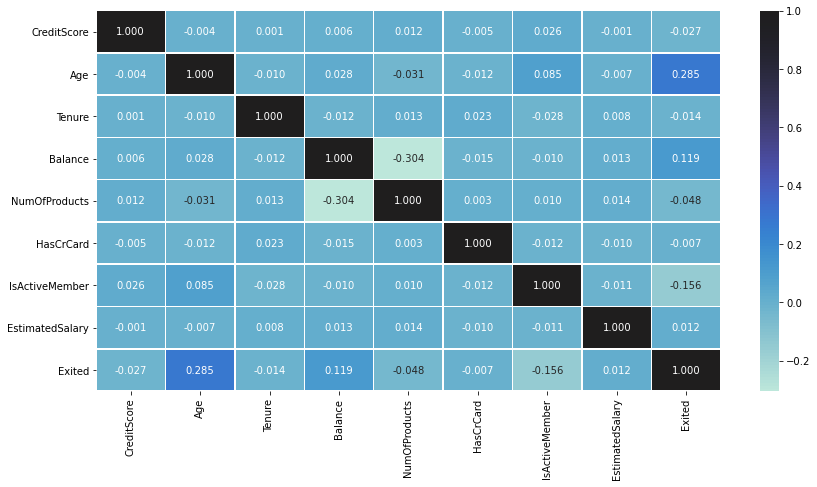

In [43]:
# heatmap
plt.figure(figsize=(14,7))
sns.heatmap(df_ini.corr(), annot=True, linewidths=.5, fmt= '.3f', center = 1 )
plt.show()

# 2.- Distinguish the features and target variable

In [44]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [45]:
X = df.drop(columns=['Exited'])
X.shape

(10000, 13)

In [46]:
y = df['Exited']
y.shape

(10000,)

# 3.- Divide the data set into training and test sets

In [47]:
# Splitting the data
SEED = 123
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [48]:
X_train.shape

(8000, 13)

In [49]:
y_train.shape

(8000,)

# 4.- Normalize the train and test data

In [50]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [51]:
X_train_std = sc.transform(X_train)
X_validation_std = sc.transform(X_validation)

In [52]:
type(X_train_std)

numpy.ndarray

# 5.- Initialize & build the model

Identify the points of improvement and implement the same. Note that you need to demonstrate at 
least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models

<p style="color:Blue"> 5.1.1- Model Arquitecture</p>

In [53]:
model = tf.keras.models.Sequential([
                                   L.Dense(26, activation='relu', input_shape =(13,)),
                                   L.Dense(13, activation='relu'),
                                   L.Dense(1, activation='sigmoid')
                                   ])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                364       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________


<p style="color:Blue"> 5.1.2- Optimizer and Loss Function</p>

In [55]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
#
loss = tf.keras.losses.BinaryCrossentropy()
#

<p style="color:Blue"> 5.1.4- Compile</p>

In [56]:
model.compile(optimizer = optimizer,
              loss=loss,
              metrics=['accuracy']
              )

<p style="color:Red"> 5.1.- Calculate Parameters</p>

<p style="color:Blue"> 5.1.5- Model Training & Checking Model Performance</p>

In [57]:
history = model.fit(X_train_std,
                    y_train,
                    batch_size=150,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_validation_std, y_validation)
                    )

Epoch 1/10
54/54 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.7544 - val_loss: 0.4942 - val_accuracy: 0.7930
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7971 - val_loss: 0.4526 - val_accuracy: 0.7945
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8030 - val_loss: 0.4351 - val_accuracy: 0.8070
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8091 - val_loss: 0.4241 - val_accuracy: 0.8110
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8133 - val_loss: 0.4138 - val_accuracy: 0.8120
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8173 - val_loss: 0.4037 - val_accuracy: 0.8185
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8241 - val_loss: 0.3935 - val_accuracy: 0.8295
Epoch 8/10
54/54 [==

<Figure size 432x288 with 0 Axes>

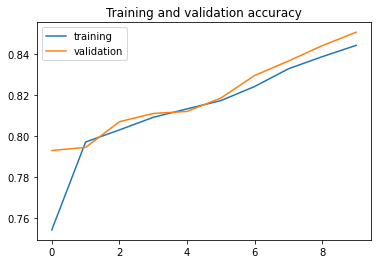

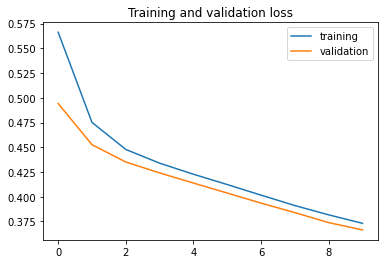

<Figure size 432x288 with 0 Axes>

In [58]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

plt.plot (epochs,     acc, label='training')
plt.plot (epochs, val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot (epochs,     loss, label='training')
plt.plot (epochs, val_loss, label='validation')
plt.title('Training and validation loss')
plt.legend()
plt.figure()



In [59]:
loss, acc = model.evaluate(X_validation_std, y_validation, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.850
Loss: 0.366


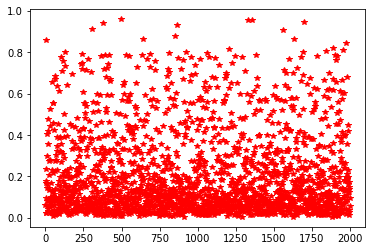

In [60]:
y_pred = model.predict(X_validation_std);
plt.plot(y_pred,'*r');

In [61]:
for i in range( len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else :
        y_pred[i] = 0

In [62]:
y_test =y_validation.reset_index(drop=True)

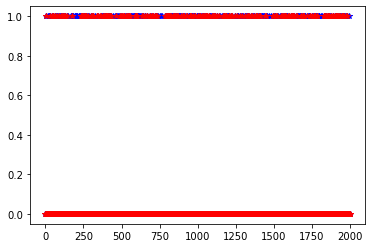

In [63]:
plt.plot(y_test, '*b');
plt.plot(y_pred, '*r');

In [64]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1528   58]
 [ 241  173]]


In [65]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1586
           1       0.75      0.42      0.54       414

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



# 5.2.- Model Arquitecture # 2

In [66]:
model2 = tf.keras.models.Sequential([
                                   L.Dense(75, activation='tanh', input_shape =(13,)),
                                   L.Dense(26, activation='tanh'),
                                   L.Dense(13, activation='tanh'),
                                   L.Dense(6, activation='tanh'),
                                   L.Dense(1, activation='sigmoid')
                                   ])

In [67]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 75)                1050      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1976      
_________________________________________________________________
dense_5 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 3,468
Trainable params: 3,468
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(lr = 0.001)  # 0.8625
#
# Loss function
loss = tf.keras.losses.BinaryCrossentropy()
#

In [69]:
# Compiler
model2.compile(optimizer = optimizer,
              loss=loss,
              metrics=['accuracy']
              )

In [70]:
history2 = model2.fit(X_train_std,
                    y_train,
                    batch_size=150,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_validation_std, y_validation)
                    )

Epoch 1/10
54/54 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.7490 - val_loss: 0.4216 - val_accuracy: 0.8130
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8221 - val_loss: 0.3905 - val_accuracy: 0.8280
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8397 - val_loss: 0.3695 - val_accuracy: 0.8445
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8519 - val_loss: 0.3607 - val_accuracy: 0.8505
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8550 - val_loss: 0.3532 - val_accuracy: 0.8535
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8597 - val_loss: 0.3507 - val_accuracy: 0.8550
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8629 - val_loss: 0.3496 - val_accuracy: 0.8565
Epoch 8/10
54/54 [==

<Figure size 432x288 with 0 Axes>

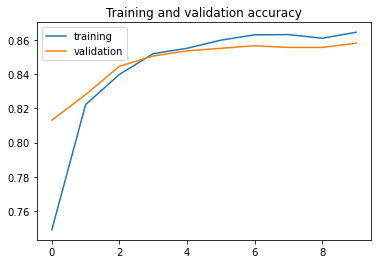

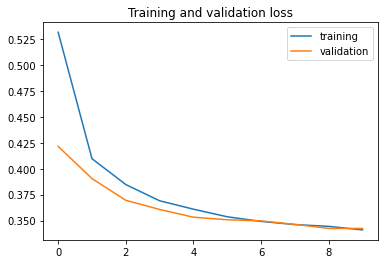

<Figure size 432x288 with 0 Axes>

In [71]:
acc      = history2.history['accuracy']
val_acc  = history2.history['val_accuracy']
loss     = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

plt.plot (epochs,     acc, label='training')
plt.plot (epochs, val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot (epochs,     loss, label='training')
plt.plot (epochs, val_loss, label='validation')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [72]:
loss2, acc2 = model2.evaluate(X_validation_std, y_validation, verbose=0)
print('Accuracy: %.3f'  % acc2)
print('Loss: %.3f' % loss2)

Accuracy: 0.858
Loss: 0.342


In [73]:
y_pred = model2.predict(X_validation_std);
for i in range( len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else :
        y_pred[i] = 0

In [74]:
cm = metrics.confusion_matrix(y_validation,y_pred)
print(cm)

[[1516   70]
 [ 214  200]]


In [75]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1586
           1       0.74      0.48      0.58       414

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# 5.3.- Model Arquitecture # 3

In [76]:
#df2 = df.copy()
#df2 = df_ini.copy()
#Converting the age to log scale for linear regression
df2 = df.copy()

In [77]:
#df2.Balance.apply(lambda x: x==1 if x=0 else x)
df2.Balance = df2.Balance.apply(lambda x: x if x>0 else 1)

#lambda x: x['c'] if x['c']>0 else x['b'], axis=1

In [78]:
df2.Balance.min()
print('CreditScore Min :', df2.Balance.min())

CreditScore Min : 1.0


In [79]:
df2.Balance = np.log(df2.Balance)
#df2.Age = np.log(df2.Age)
#df2.CreditScore = np.log(df2.CreditScore)

In [80]:
df2.Balance.min()

0.0

In [81]:
#df2 = df2.drop(columns=['Geography','Gender','Tenure','EstimatedSalary'])    # Accuracy 0.859
#df2 = df2.drop(columns=['Tenure','EstimatedSalary'])    # Accuracy 0.853

In [82]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,11.336282,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,11.980807,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.000000,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,11.740147,1,1,1,79084.10,0,0,0,1,1,0


In [83]:
X2 = df2.drop(columns=['Exited'])
X2.shape

(10000, 13)

In [84]:
y2 = df2['Exited']
y2.shape

(10000,)

In [85]:
X_train, X_validation, y_train, y_validation = train_test_split(X2, y2, test_size=0.2, random_state=SEED)

In [86]:
sc2 = StandardScaler()
sc2.fit(X_train)

StandardScaler()

In [87]:
X_train_std = sc2.transform(X_train)
X_validation_std = sc2.transform(X_validation)

In [88]:
model3 = tf.keras.models.Sequential([
                                   L.Dense(39, activation='tanh', input_shape =(13,)),
                                   L.Dense(26, activation='tanh'),
                                   L.Dense(13, activation='tanh'),
                                   L.Dense(6, activation='tanh'),
                                   L.Dense(1, activation='sigmoid')
                                   ])

In [89]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 39)                546       
_________________________________________________________________
dense_9 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 13)                351       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 2,028
Trainable params: 2,028
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(lr = 0.001)  # 0.8625
#
# Loss function
loss = tf.keras.losses.BinaryCrossentropy()
#

In [91]:
# Compiler
model3.compile(optimizer = optimizer,
              loss=loss,
              metrics=['accuracy']
              )

In [92]:
history3 = model3.fit(X_train_std,
                    y_train,
                    batch_size=150,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_validation_std, y_validation)
                    )

Epoch 1/10
54/54 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7289 - val_loss: 0.4760 - val_accuracy: 0.7975
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8120 - val_loss: 0.4234 - val_accuracy: 0.8225
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8210 - val_loss: 0.4102 - val_accuracy: 0.8275
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8295 - val_loss: 0.3973 - val_accuracy: 0.8260
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8367 - val_loss: 0.3827 - val_accuracy: 0.8345
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8441 - val_loss: 0.3728 - val_accuracy: 0.8405
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8511 - val_loss: 0.3635 - val_accuracy: 0.8460
Epoch 8/10
54/54 [==

<Figure size 432x288 with 0 Axes>

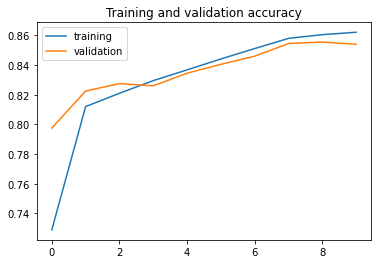

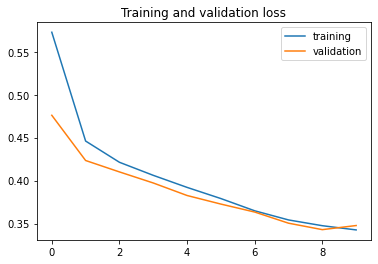

<Figure size 432x288 with 0 Axes>

In [93]:
acc      = history3.history['accuracy']
val_acc  = history3.history['val_accuracy']
loss     = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

plt.plot (epochs,     acc, label='training')
plt.plot (epochs, val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot (epochs,     loss, label='training')
plt.plot (epochs, val_loss, label='validation')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [94]:
loss3, acc3 = model3.evaluate(X_validation_std, y_validation, verbose=0)
print('Accuracy: %.3f'  % acc3)
print('Loss: %.3f' % loss3)

Accuracy: 0.854
Loss: 0.348


In [95]:
y_pred = model3.predict(X_validation_std);
for i in range( len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else :
        y_pred[i] = 0

In [96]:
cm = metrics.confusion_matrix(y_validation,y_pred)
print(cm)

[[1531   55]
 [ 237  177]]


In [97]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1586
           1       0.76      0.43      0.55       414

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



# 5.4.- Model Arquitecture # 4

<p style="color:Blue"> 5.4.1.- Polynomial models reflecting the non-linear interaction between some dimensions (Full data)</p>

In [117]:
df4 = df.copy()

In [118]:
X4 = df4.drop(columns=['Exited'])
X4.shape

(10000, 13)

In [119]:
y4 = df4['Exited']
y4.shape

(10000,)

In [120]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [121]:
X_poly = poly.fit_transform(X4)

In [122]:
X_train, X_validation, y_train, y_validation = train_test_split(X_poly, y4, test_size = 0.2, random_state=SEED)
X_validation.shape

(2000, 92)

In [123]:
sc4 = StandardScaler()
sc4.fit(X_train)

StandardScaler()

In [124]:
X_train_std = sc4.transform(X_train)
X_validation_std = sc4.transform(X_validation)

In [125]:
model4 = tf.keras.models.Sequential([
                                   L.Dense(92, activation='tanh', input_shape =(92,)),
                                   L.Dense(92, activation='tanh'),
                                   L.Dense(46, activation='tanh'),
                                   L.Dense(23, activation='tanh'),
                                   L.Dense(1, activation='sigmoid')
                                   ])

In [126]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 92)                8556      
_________________________________________________________________
dense_19 (Dense)             (None, 92)                8556      
_________________________________________________________________
dense_20 (Dense)             (None, 46)                4278      
_________________________________________________________________
dense_21 (Dense)             (None, 23)                1081      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 24        
Total params: 22,495
Trainable params: 22,495
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Optimizer
optimizer = tf.keras.optimizers.Adamax(lr = 0.001)  # 0.8625
#
# Loss function
loss = tf.keras.losses.BinaryCrossentropy()
#

In [128]:
# Compiler
model4.compile(optimizer = optimizer,
              loss=loss,
              metrics=['accuracy']
              )

In [129]:
history4 = model4.fit(X_train_std,
                    y_train,
                    batch_size=150,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_validation_std, y_validation)
                    )

Epoch 1/10
54/54 [==============================] - 0s 4ms/step - loss: 0.4948 - accuracy: 0.7740 - val_loss: 0.4193 - val_accuracy: 0.8190
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8261 - val_loss: 0.3970 - val_accuracy: 0.8300
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8386 - val_loss: 0.3814 - val_accuracy: 0.8375
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8468 - val_loss: 0.3724 - val_accuracy: 0.8390
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8497 - val_loss: 0.3660 - val_accuracy: 0.8505
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8576 - val_loss: 0.3592 - val_accuracy: 0.8460
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.8600 - val_loss: 0.3551 - val_accuracy: 0.8490
Epoch 8/10
54/54 [==

<Figure size 432x288 with 0 Axes>

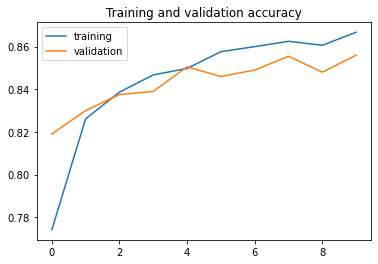

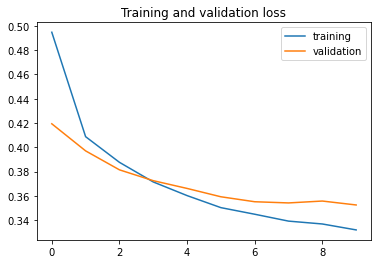

<Figure size 432x288 with 0 Axes>

In [130]:
acc      = history4.history['accuracy']
val_acc  = history4.history['val_accuracy']
loss     = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

plt.plot (epochs,     acc, label='training')
plt.plot (epochs, val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot (epochs,     loss, label='training')
plt.plot (epochs, val_loss, label='validation')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [131]:
loss4, acc4 = model4.evaluate(X_validation_std, y_validation, verbose=0)
print('Accuracy: %.3f'  % acc4)
print('Loss: %.3f' % loss4)

Accuracy: 0.856
Loss: 0.352


In [132]:
y_pred = model4.predict(X_validation_std);
for i in range( len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else :
        y_pred[i] = 0

In [133]:
cm = metrics.confusion_matrix(y_validation,y_pred)
print(cm)

[[1522   64]
 [ 224  190]]


In [134]:
cr=metrics.classification_report(y_validation,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.75      0.46      0.57       414

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



# Observations

1.- All models gives pretty similar results where accuracy is 0.86

2.- Increasy in hidden neural network speedit up the solution

3.- Some considerations like use of log for outliers (Balance feaure), drop features (Tenure), and polynomial does not changes final accuracy results. 